In [137]:
import statsmodels.formula.api as sm
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [138]:
df = pd.read_csv("../data/dc_bikes_new_days.csv", index_col=0, parse_dates=["datetime"])
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day,hour,month,part_of_day,week_day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16,1,0,1,night,Saturday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40,1,1,1,night,Saturday
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32,1,2,1,night,Saturday
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13,1,3,1,night,Saturday
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1,1,4,1,night,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,156,31,19,12,evening,Monday
17375,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,104,31,20,12,evening,Monday
17376,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,67,31,21,12,evening,Monday
17377,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,43,31,22,12,evening,Monday


In [139]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day,hour,month,part_of_day,week_day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16,1,0,1,night,Saturday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40,1,1,1,night,Saturday
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32,1,2,1,night,Saturday
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13,1,3,1,night,Saturday
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1,1,4,1,night,Saturday


In [140]:
df_subset = df.set_index("datetime")
df_subset.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day,hour,month,part_of_day,week_day
datetime,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16,1,0,1,night,Saturday
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40,1,1,1,night,Saturday
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32,1,2,1,night,Saturday
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13,1,3,1,night,Saturday
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1,1,4,1,night,Saturday


In [141]:
df_subset = df_subset[["temp","atemp","humidity","windspeed","count"]]
df_subset

,temp,atemp,humidity,windspeed,count
datetime,,,,,
2011-01-01 00:00:00,9.84,14.395,81,0.0000,16
2011-01-01 01:00:00,9.02,13.635,80,0.0000,40
2011-01-01 02:00:00,9.02,13.635,80,0.0000,32
2011-01-01 03:00:00,9.84,14.395,75,0.0000,13
2011-01-01 04:00:00,9.84,14.395,75,0.0000,1
...,...,...,...,...,...
2012-12-31 19:00:00,10.66,12.880,60,11.0014,156
2012-12-31 20:00:00,10.66,12.880,60,11.0014,104
2012-12-31 21:00:00,10.66,12.880,60,11.0014,67


In [142]:
df_subset.dropna(inplace=True)
df_subset

,temp,atemp,humidity,windspeed,count
datetime,,,,,
2011-01-01 00:00:00,9.84,14.395,81,0.0000,16
2011-01-01 01:00:00,9.02,13.635,80,0.0000,40
2011-01-01 02:00:00,9.02,13.635,80,0.0000,32
2011-01-01 03:00:00,9.84,14.395,75,0.0000,13
2011-01-01 04:00:00,9.84,14.395,75,0.0000,1
...,...,...,...,...,...
2012-12-31 19:00:00,10.66,12.880,60,11.0014,156
2012-12-31 20:00:00,10.66,12.880,60,11.0014,104
2012-12-31 21:00:00,10.66,12.880,60,11.0014,67


In [143]:
df_subset.corr(numeric_only=True)

,temp,atemp,humidity,windspeed,count
temp,1.000000,0.987672,-0.069881,-0.023125,0.414713
atemp,0.987672,1.000000,-0.051918,-0.062336,0.411854
humidity,-0.069881,-0.051918,1.000000,-0.290105,-0.329615
windspeed,-0.023125,-0.062336,-0.290105,1.000000,0.099909
count,0.414713,0.411854,-0.329615,0.099909,1.000000


<Axes: >

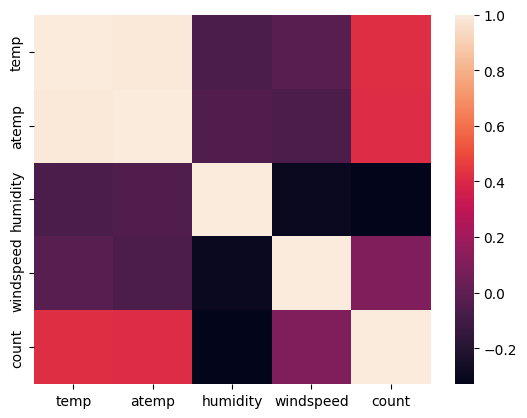

In [144]:
sns.heatmap(df_subset.corr(numeric_only=True))

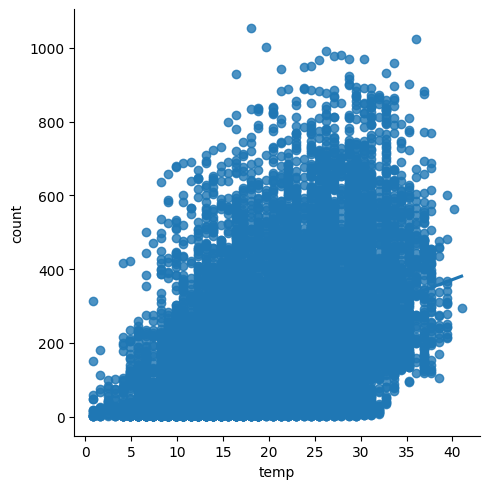

In [145]:
sns.lmplot(data=df_subset, x='temp', y='count', ci=None);

In [146]:
model1 = sm.ols(formula='count ~ temp', data=df_subset).fit()
model1.params

Intercept   -1.502696
temp         9.330142
dtype: float64

In [147]:
model1.rsquared_adj

0.17193951437174193

In [148]:
model2 = sm.ols(formula='count ~ temp + atemp', data=df_subset).fit()
model2.params

Intercept   -5.085982
temp         7.286584
atemp        1.901057
dtype: float64

In [149]:
model2.rsquared_adj

0.17209913556328493

In [150]:
model3 = sm.ols(formula='count ~ temp + atemp + humidity', data=df_subset).fit()
model3.params

Intercept    173.894370
temp           2.036349
atemp          6.335632
humidity      -2.829782
dtype: float64

In [151]:
model3.rsquared_adj

0.26495883334221726

In [152]:
model4 = sm.ols(formula='count ~ temp + atemp + humidity + windspeed', data=df_subset).fit()
model4.params

Intercept    155.215146
temp           0.902444
atemp          7.422851
humidity      -2.738443
windspeed      0.800181
dtype: float64

In [153]:
model4.rsquared_adj

0.2660961247219641

In [185]:
df_subset_magic = df[["temp","atemp","humidity","windspeed","count","hour","month",
                             "day", "season", "holiday"]]
df_subset_magic

,temp,atemp,humidity,windspeed,count,hour,month,day,season,holiday
0,9.84,14.395,81,0.0000,16,0,1,1,1,0
1,9.02,13.635,80,0.0000,40,1,1,1,1,0
2,9.02,13.635,80,0.0000,32,2,1,1,1,0
3,9.84,14.395,75,0.0000,13,3,1,1,1,0
4,9.84,14.395,75,0.0000,1,4,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...
17374,10.66,12.880,60,11.0014,156,19,12,31,1,0
17375,10.66,12.880,60,11.0014,104,20,12,31,1,0
17376,10.66,12.880,60,11.0014,67,21,12,31,1,0
17377,10.66,13.635,56,8.9981,43,22,12,31,1,0


In [158]:
df_subset_magic.corr(numeric_only=True)

,temp,atemp,humidity,windspeed,count,hour,month,day,season,holiday
temp,1.000000,0.987672,-0.069881,-0.023125,0.414713,0.137603,0.201691,0.027180,0.312025,-0.027340
atemp,0.987672,1.000000,-0.051918,-0.062336,0.411854,0.133750,0.208096,0.021269,0.319380,-0.030973
humidity,-0.069881,-0.051918,1.000000,-0.290105,-0.329615,-0.276498,0.164411,0.025663,0.150625,-0.010588
windspeed,-0.023125,-0.062336,-0.290105,1.000000,0.099909,0.137252,-0.135386,0.010505,-0.149773,0.003988
count,0.414713,0.411854,-0.329615,0.099909,1.000000,0.401792,0.140083,-0.022211,0.195452,-0.013600
hour,0.137603,0.133750,-0.276498,0.137252,0.401792,1.000000,-0.005772,0.001538,-0.006117,0.000479
month,0.201691,0.208096,0.164411,-0.135386,0.140083,-0.005772,1.000000,0.007929,0.830386,0.018430
day,0.027180,0.021269,0.025663,0.010505,-0.022211,0.001538,0.007929,1.000000,-0.003052,-0.010132
season,0.312025,0.319380,0.150625,-0.149773,0.195452,-0.006117,0.830386,-0.003052,1.000000,-0.009585
holiday,-0.027340,-0.030973,-0.010588,0.003988,-0.013600,0.000479,0.018430,-0.010132,-0.009585,1.000000


<Axes: >

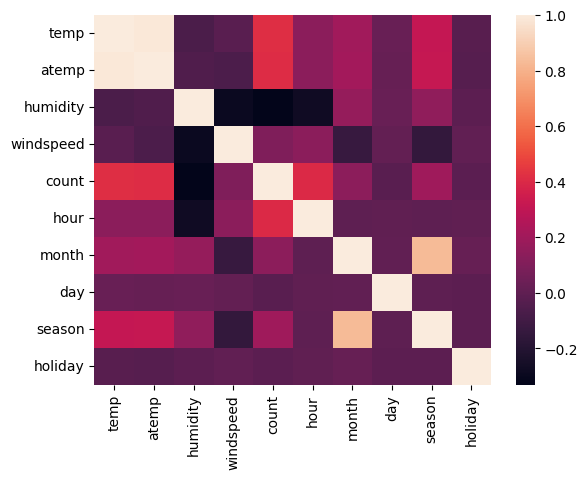

In [159]:
sns.heatmap(df_subset_magic.corr(numeric_only=True))

In [160]:
model1_magic = sm.ols(formula='count ~ temp + atemp + humidity + windspeed + hour', data=df_subset_magic).fit()
model1_magic.params

Intercept    52.568771
temp          1.447701
atemp         6.179305
humidity     -2.075593
windspeed     0.325486
hour          7.412349
dtype: float64

In [161]:
model1_magic.rsquared_adj

0.34136818315103423

In [162]:
model2_magic = sm.ols(formula='count ~ temp + atemp + humidity + windspeed + hour + month', data=df_subset_magic).fit()
model2_magic.rsquared_adj

0.35347253482466734

In [163]:
model3_magic = sm.ols(formula='count ~ temp + atemp + humidity + windspeed + hour + month + day', data=df_subset_magic).fit()
model3_magic.rsquared_adj

0.35406764015301007

In [164]:
model3_magic = sm.ols(formula='count ~ temp + atemp + humidity + windspeed + hour + month + day', data=df_subset_magic).fit()
model3_magic.rsquared_adj

0.35406764015301007

In [165]:
model4_magic = sm.ols(formula='count ~ temp + atemp + humidity + windspeed + hour + month + day + season', data=df_subset_magic).fit()
model4_magic.rsquared_adj

0.3580523647427729

In [166]:
model5_magic = sm.ols(formula='count ~ temp + atemp + humidity + windspeed + hour + month + day + season + holiday', data=df_subset_magic).fit()
model5_magic.rsquared_adj

0.35805379011308336

In [187]:
df_one_day = df_subset.loc["2011-01-01"]
df_one_day.head()

,temp,atemp,humidity,windspeed,count
datetime,,,,,
2011-01-01 00:00:00,9.84,14.395,81,0.0,16
2011-01-01 01:00:00,9.02,13.635,80,0.0,40
2011-01-01 02:00:00,9.02,13.635,80,0.0,32
2011-01-01 03:00:00,9.84,14.395,75,0.0,13
2011-01-01 04:00:00,9.84,14.395,75,0.0,1


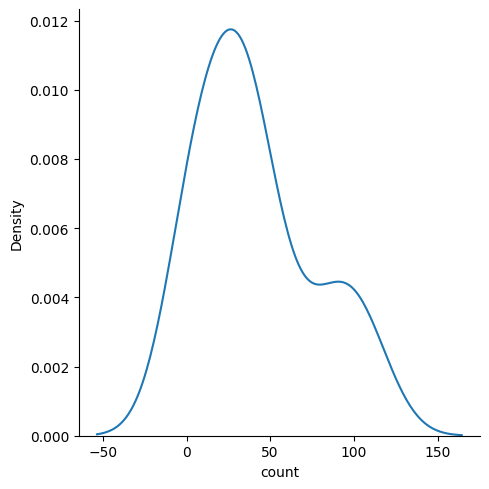

In [188]:
sns.displot(data=df_one_day, x='count', kind="kde");

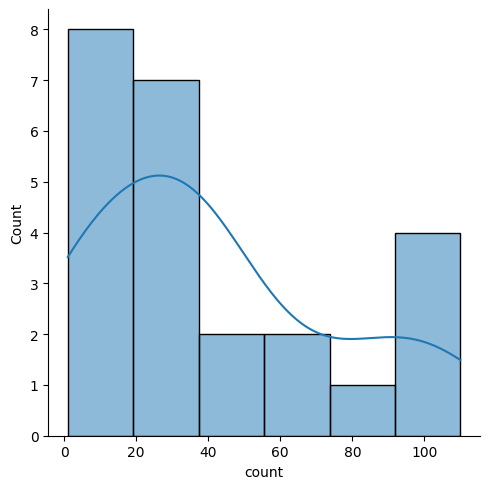

In [189]:
sns.displot(data=df_one_day, x="count",kde=True);

In [170]:
df_2011 = df_subset.loc["2011"]
df_2011

,temp,atemp,humidity,windspeed,count
datetime,,,,,
2011-01-01 00:00:00,9.84,14.395,81,0.0000,16
2011-01-01 01:00:00,9.02,13.635,80,0.0000,40
2011-01-01 02:00:00,9.02,13.635,80,0.0000,32
2011-01-01 03:00:00,9.84,14.395,75,0.0000,13
2011-01-01 04:00:00,9.84,14.395,75,0.0000,1
...,...,...,...,...,...
2011-12-31 19:00:00,17.22,21.210,54,15.0013,131
2011-12-31 20:00:00,17.22,21.210,54,15.0013,105
2011-12-31 21:00:00,16.40,20.455,58,12.9980,91


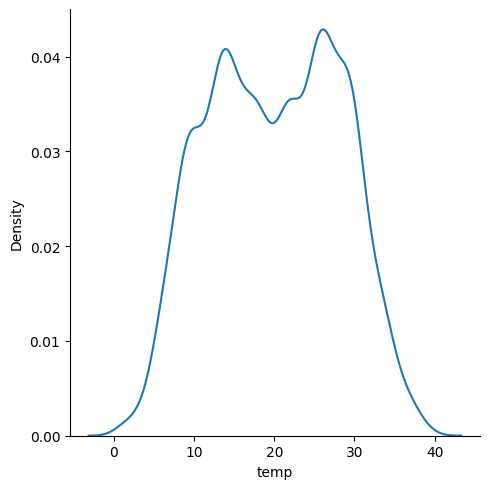

In [171]:
sns.displot(data=df_2011, x='temp', kind="kde");

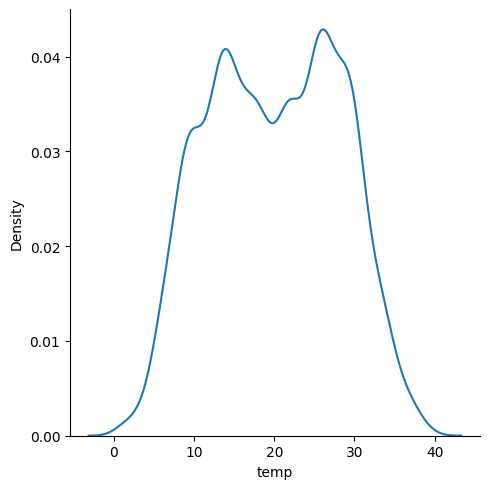

In [190]:
sns.displot(data=df_2011, x='temp',kind="kde");

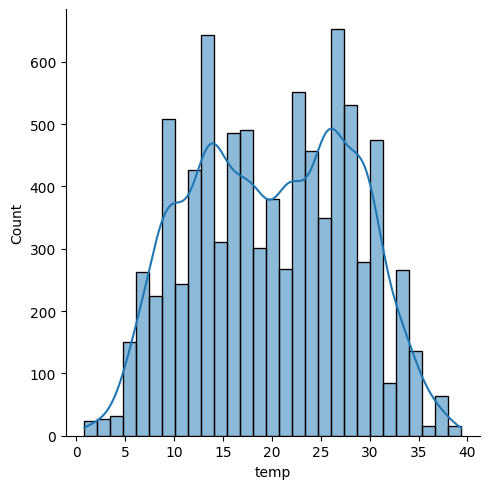

In [173]:
sns.displot(data=df_2011, x='temp', kde=True);

In [174]:
df_windspeed = df_subset["windspeed"]
df_windspeed

datetime
2011-01-01 00:00:00     0.0000
2011-01-01 01:00:00     0.0000
2011-01-01 02:00:00     0.0000
2011-01-01 03:00:00     0.0000
2011-01-01 04:00:00     0.0000
                        ...   
2012-12-31 19:00:00    11.0014
2012-12-31 20:00:00    11.0014
2012-12-31 21:00:00    11.0014
2012-12-31 22:00:00     8.9981
2012-12-31 23:00:00     8.9981
Name: windspeed, Length: 17379, dtype: float64

In [175]:
df_subset["windspeed"].mean(), len(df_subset["windspeed"])

(12.736539622532941, 17379)

In [176]:
bootstrap_sample_windspeed = df_windspeed.sample(n=100, replace=True)
print(len(bootstrap_sample_windspeed))
bootstrap_sample_windspeed.mean()

100


12.650203000000001

In [177]:
sample_means = []

for i in range(10_000):
    
    bootstrap_sample_windspeed = df_windspeed.sample(n=100, replace=True)
    
    sample_means.append(bootstrap_sample_windspeed.mean())

In [118]:
sample_means

[12.663713039309684,
 12.60153087248322,
 12.697315819750719,
 12.480706040268457,
 12.61407008628955,
 12.11444151486098,
 12.398308245445829,
 12.900512751677853,
 13.219806615532118,
 12.340738350910835,
 12.800815723873441,
 13.061659635666349,
 12.683858005752636,
 12.331012751677852,
 12.533336049856183,
 12.39442828379674,
 12.699281495685524,
 12.299581208053691,
 12.48062895493768,
 12.664715148609782,
 13.0213953978907,
 13.455771236816874,
 12.771189261744965,
 12.330100575263662,
 12.841291946308724,
 12.714537967401727,
 12.715495110258868,
 12.575527420901246,
 12.463387535953979,
 12.554457430488974,
 12.425037583892617,
 13.242906519654843,
 12.9600033557047,
 12.628247363374879,
 12.841259827420902,
 12.474860402684563,
 12.660899424736337,
 12.527657430488974,
 12.817196356663471,
 12.338682742090125,
 12.823041994247363,
 12.893838446788111,
 12.932175551294343,
 12.827724928092042,
 12.52571744966443,
 12.534479482262702,
 12.636013710450625,
 12.70785723873442,
 13

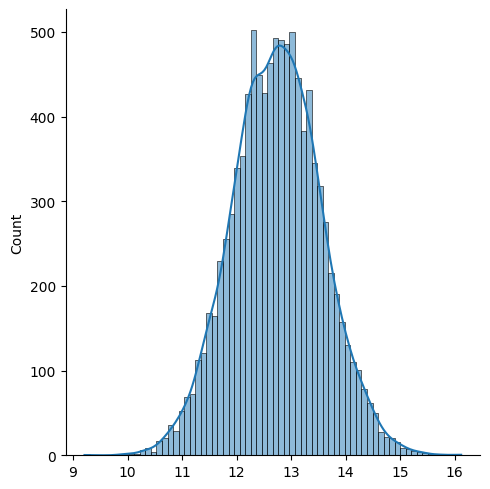

In [178]:
sns.displot(sample_means, kde=True);

In [179]:
sample_means_series = pd.Series(sample_means)

In [180]:
alpha = 0.95
lower_quantile = 0.025
upper_quantile = 0.975

In [181]:
lower = sample_means_series.quantile(lower_quantile)

upper = sample_means_series.quantile(upper_quantile)
lower, upper

(11.15033765, 14.360378)

In [182]:
sample_mean_windspeed = df_windspeed.mean()
sample_std_windspeed = df_windspeed.std()

sample_mean_windspeed, sample_std_windspeed


(12.736539622532941, 8.196795314376963)

In [183]:
z = 1.96
n = 100

lower_limit_eq = sample_mean_windspeed - (   (z *sample_std_windspeed)   /   np.sqrt(n)  )
upper_limit_eq = sample_mean_windspeed + (   (z *sample_std_windspeed)   /   np.sqrt(n)  )
lower_limit_eq , upper_limit_eq

(11.129967740915056, 14.343111504150826)

In [184]:
print(f"Comparrison 'z-value' - Lower limit:{lower_limit_eq}, Upper limit:{upper_limit_eq}n\
      to 'bootstrapping method' - Lower limit:{lower}, Upper limit: {upper}")



Comparrison 'z-value' - Lower limit:11.129967740915056, Upper limit:14.343111504150826n      to 'bootstrapping method' - Lower limit:11.15033765, Upper limit: 14.360378
